# Generate basic applicant compositions

1. Preparation

In [1]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
import json

In [2]:
path=Path()
parent_path=str(path.parent.absolute())[:-10]

In [3]:
removed_csv=parent_path+"/data/csvs/hmda_2017_ca_noname.csv"

In [4]:
numerics = ['loan_amount_000s', 'applicant_income_000s', 'population', 'minority_population',
            'hud_median_family_income', 'tract_to_msamd_income', 'number_of_owner_occupied_units',
            'number_of_1_to_4_family_units', 'application_date_indicator', 'rate_spread']
dtypes={}
for num in numerics:
        dtypes[num] = 'float64'

In [5]:
skimmed_df=pd.read_csv(removed_csv, low_memory=False, dtype=dtypes, na_values=' ')

In [6]:
js_road=parent_path+"/src/data_processing/code_map.json"

In [7]:
with open(js_road, 'r') as fh:
    code_map=json.load(fh)
    for i in code_map.keys():
        code_map[i]={int(m):n for m, n in code_map[i].items()}

In [8]:
skimmed_df.columns

Index(['as_of_year', 'respondent_id', 'agency_abbr', 'agency_code',
       'loan_type', 'property_type', 'loan_purpose', 'owner_occupancy',
       'loan_amount_000s', 'preapproval', 'action_taken', 'msamd',
       'state_abbr', 'state_code', 'county_code', 'census_tract_number',
       'applicant_ethnicity', 'co_applicant_ethnicity', 'applicant_race_1',
       'applicant_race_2', 'applicant_race_3', 'applicant_race_4',
       'applicant_race_5', 'co_applicant_race_1', 'co_applicant_race_2',
       'co_applicant_race_3', 'co_applicant_race_4', 'co_applicant_race_5',
       'applicant_sex', 'co_applicant_sex', 'applicant_income_000s',
       'purchaser_type', 'denial_reason_1', 'denial_reason_2',
       'denial_reason_3', 'rate_spread', 'hoepa_status', 'lien_status',
       'edit_status', 'sequence_number', 'population', 'minority_population',
       'hud_median_family_income', 'tract_to_msamd_income',
       'number_of_owner_occupied_units', 'number_of_1_to_4_family_units',
       'appl

In [9]:
code_map.keys()

dict_keys(['agency', 'loan_type', 'property_type', 'loan_purpose', 'owner_occupancy', 'preapproval', 'action_taken', 'ethnicity', 'race', 'sex', 'purchaser_type', 'denial_reason', 'hoepa_status', 'lien_status', 'edit_status', 'county'])

In [10]:
image_path=parent_path+'/result/eda/'
if not os.path.exists(image_path):
    os.makedirs(image_path)

2. Gender analysis

In [17]:
genderMap=code_map['sex'].copy()
genderMap[3]='Information not provided by applicant'

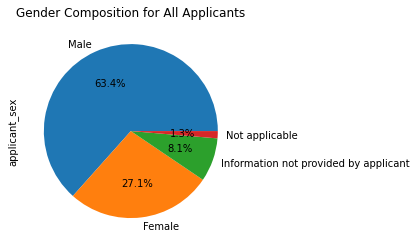

In [19]:
Sex_total=skimmed_df['applicant_sex'].value_counts()
plt.figure()
Sex_total=Sex_total.rename(index=genderMap)
Sex_total.plot.pie(legend=False, title='Gender Composition for All Applicants',autopct='%1.1f%%')
plt.savefig(image_path+'Total_applicant_gender.png', bbox_inches='tight')

'E:\\ECE143-HMDA_Mortagage_Analysis_and_Prediction\\notebooks'

'E:\\ECE143-HMDA_Mortagage_Analysis_and_Prediction'